# Assignment - 2
- Develop an algorithm, and write code to ensure that no student receives two passages on the same topic. 

Algorithm 
- Extract files from the directory, convert them into train/test datasets
- Resample it 
- Preprocessing
- model preparation 
- Feature Engineering 
- Applying different algorithms
- RESULT


In [1]:
#loading training data
import pandas as pd
import os
from tqdm import tqdm

data_path = r'C:\Users\Zoe\Downloads\exercise_task\exercise_task\data'
train_texts = []
train_labels = []
for category in ['business', 'entertainment', 'politics', 'sport', 'tech' ]:
    train_path = os.path.join(data_path, 'train', category)
    for fname in tqdm(sorted(os.listdir(train_path))):
        if fname.endswith('.txt'):
            with open(os.path.join(train_path, fname)) as f:
                train_texts.append(f.read())
            train_labels.append(category)
print("\nTrain done\n")
    

100%|██████████████████████████████████████████████████████████████████████████████| 351/351 [00:00<00:00, 2222.57it/s]


Train done



In [2]:
#for tes data
data_path = r'C:\Users\Zoe\Downloads\exercise_task\exercise_task\data'
test_texts = []
test_labels = []
for category in ['business', 'entertainment', 'politics', 'sport', 'tech' ]:
    train_path = os.path.join(data_path, 'test', category)
    for fname in tqdm(sorted(os.listdir(train_path))):
        if fname.endswith('.txt'):
            with open(os.path.join(train_path, fname)) as f:
                test_texts.append(f.read())
                
            test_labels.append(category)
print("\nTest done\n")

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1851.20it/s]


Test done



In [3]:
# pd.DataFrame(train_texts, train_labels ,columns = ["texts", "tags"])
df = pd.DataFrame(train_texts , columns = ['texts'])
df['tags'] = train_labels
df.sample(frac = 1)

df = df.sample(frac = 1) #shuffling data
df

,texts,tags
1966,Ultra fast wi-fi nears completion\n\nUltra hig...,tech
1305,Wenger handed summer war chest\n\nArsenal boss...,sport
1171,Off-colour Gardener storms to win\n\nBritain's...,sport
1882,Apple sues 'Tiger' file sharers\n\nApple has t...,tech
1727,Games 'deserve a place in class'\n\nComputer g...,tech
...,...,...
665,Show over for MTV's The Osbournes\n\nRock star...,entertainment
504,Jugnot 'tops French actor league'\n\nActor Ger...,entertainment
1633,Google's toolbar sparks concern\n\nSearch engi...,tech
661,BBC 'should allow more scrutiny'\n\nMPs have u...,entertainment


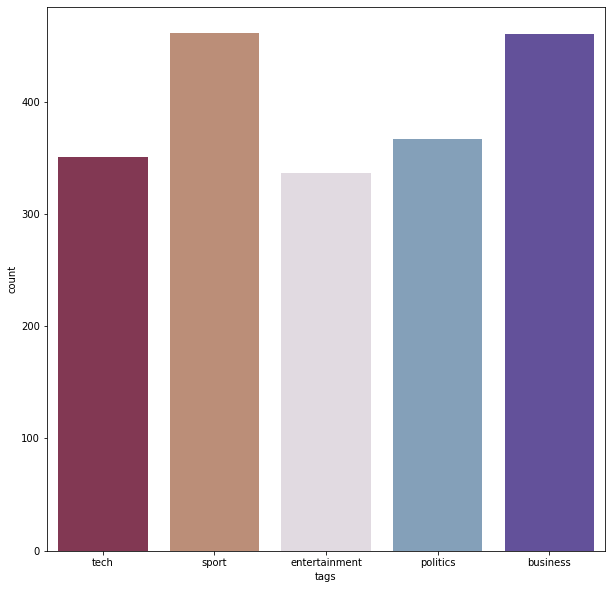

In [4]:
import seaborn as sns 

import matplotlib.pyplot as plt
# %matplotlib.inline

plt.figure(figsize = (10, 10))
sns.countplot(x = df['tags'],  palette = 'twilight_shifted_r')
plt.show()

business and sports seems to be in a greater number followed by politics.

In [5]:
#text preprocessing
import re
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
#     text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['texts'] = df['texts'].apply(clean_text)
df['texts'][0]

'ad sales boost time warner profitquarterly profits us media giant timewarner jumped 76 113bn 600m three months december 639m yearearlierthe firm one biggest investors google benefited sales highspeed internet connections higher advert sales timewarner said fourth quarter sales rose 2 111bn 109bn profits buoyed oneoff gains offset profit dip warner bros less users aoltime warner said friday owns 8 searchengine google internet business aol mixed fortunes lost 464 000 subscribers fourth quarter profits lower preceding three quarters however company said aols underlying profit exceptional items rose 8 back stronger internet advertising revenues hopes increase subscribers offering online service free timewarner internet customers try sign aols existing customers highspeed broadband timewarner also restate 2000 2003 results following probe us securities exchange commission sec close concludingtime warners fourth quarter profits slightly better analysts expectations film division saw profits

In [6]:
#calculating the total words
df['texts'].apply(lambda x: len(x.split(' '))).sum()




431131

# Model preparation

In [7]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\Zoe\anaconda3\envs\deeplearning\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
#splitting

X = df.texts
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## feature engineering. 
 - We will convert our text documents to a matrix of token counts (CountVectorizer)
 - then transform a count matrix to a normalized tf-idf representation (tf-idf transformer). 
 - After that, we train several classifiers.

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [10]:


%%time

my_tags = ['business', 'entertainment', 'politics', 'sport', 'tech' ]
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names= my_tags))

accuracy 0.9629005059021922
               precision    recall  f1-score   support

     business       0.94      0.99      0.96       134
entertainment       0.99      0.87      0.93       102
     politics       0.96      0.96      0.96       112
        sport       0.97      1.00      0.99       140
         tech       0.97      0.96      0.97       105

     accuracy                           0.96       593
    macro avg       0.96      0.96      0.96       593
 weighted avg       0.96      0.96      0.96       593

Wall time: 224 ms


In [11]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [12]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.9881956155143339
               precision    recall  f1-score   support

     business       0.99      0.98      0.98       134
entertainment       0.98      0.98      0.98       102
     politics       0.98      0.98      0.98       112
        sport       0.99      1.00      1.00       140
         tech       0.99      1.00      1.00       105

     accuracy                           0.99       593
    macro avg       0.99      0.99      0.99       593
 weighted avg       0.99      0.99      0.99       593

Wall time: 305 ms


In [13]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [14]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))



accuracy 0.984822934232715
               precision    recall  f1-score   support

     business       0.97      0.98      0.97       134
entertainment       0.98      0.98      0.98       102
     politics       0.98      0.97      0.98       112
        sport       0.99      1.00      1.00       140
         tech       1.00      0.99      1.00       105

     accuracy                           0.98       593
    macro avg       0.99      0.98      0.98       593
 weighted avg       0.98      0.98      0.98       593

Wall time: 252 ms


- Logistic Regression and SGDC Classifier gives better accuracy. 
- Moving with Logistic Regression.

In [15]:
#testing our data on test set

df2 = pd.DataFrame(test_texts, columns = ['text'])
df2['tags'] = test_labels

df2 = df2.sample(frac = 1)
# df2['text'] = df2['text'].apply(clean_text)
y_pred = sgd.predict(df2['text'])

final_df = df2[['text', 'tags']]
final_df['predicted'] = y_pred
final_df[:40]

,text,tags,predicted
199,Roddick to face Saulnier in final\n\nAndy Rodd...,sport,sport
26,World leaders gather to face uncertainty\n\nMo...,business,politics
59,Abba queen enters music rich list\n\nThe woman...,entertainment,entertainment
185,Slovakia reach Hopman Cup final\n\nSlovakia wi...,sport,sport
39,Low-cost airlines hit Eurotunnel\n\nChannel Tu...,business,business
29,Brazil jobless rate hits new low\n\nBrazil's u...,business,business
114,At a glance: Tory health checks\n\nThe UK' opp...,politics,politics
120,Plan to give elderly care control\n\nElderly a...,politics,politics
221,Software watching while you work\n\nSoftware t...,tech,tech
63,Ray DVD beats box office takings\n\nOscar-nomi...,entertainment,entertainment


- By witnessing the comparison between actual and predicted, Our model predicted well.

In [16]:
#using logistic regression 


#combining_t
c_df = train_texts + test_texts
c_df = pd.DataFrame(c_df, columns = ["texts"])
# train_labels + test_labels
c_df['tags'] = train_labels + test_labels
c_df = c_df.sample(frac = 1)
#preditciton on the data
c_df['Predicted tags'] = logreg.predict(c_df['texts'])
c_df

,texts,tags,Predicted tags
352,Giant waves damage S Asia economy\n\nGovernmen...,business,business
1647,Game firm holds 'cast' auditions\n\nVideo game...,tech,tech
444,Executive trio leave Aer Lingus\n\nThree senio...,business,business
1290,Smith aims to bring back respect\n\nScotland m...,sport,sport
375,Dollar slides ahead of New Year\n\nThe US doll...,business,business
...,...,...,...
1594,Davenport hits out at Wimbledon\n\nWorld numbe...,sport,sport
754,Dame Julie pops in to see Poppins\n\nMary Popp...,entertainment,entertainment
1094,Conservative backing for ID cards\n\nThe Torie...,politics,politics
570,Elton plays Paris charity concert\n\nSir Elton...,entertainment,entertainment


In [17]:
# function to generating random two passages and which should not have same label

def v1(n = c_df.sample(n = 2)):
    tags = []
    for i in n['Predicted tags']:
        tags.append(i)
        
    if len(set(tags)) == 1: #if it has same tags
        return v1(n = c_df.sample(n = 2)) #recall the function again 
    else: #if it does not return , the data
        c = pd.DataFrame(n['texts'], columns = ['texts'])
        c = c.set_index(n['tags'])
        return c
        
        
    

In [18]:
v1()

,texts
tags,
business,Bank set to leave rates on hold\n\nUK interest...
politics,Kennedy questions trust of Blair\n\nLib Dem le...
